Thanks->
MEER ATIF MAGSI  🧒Sleep States Child || Analysis and visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
import pyarrow.parquet as pq

In [2]:
train_events = pd.read_csv('/kaggle/input/child-mind-institute-detect-sleep-states/train_events.csv')
# drop NAN rows
train_events = train_events.dropna(axis=0)
train_events

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400
...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05T09:26:00-0400
14502,fe90110788d2,33,onset,556560.0,2017-09-05T22:30:00-0400
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06T04:07:00-0400
14504,fe90110788d2,34,onset,574620.0,2017-09-06T23:35:00-0400


In [3]:
print('************************************************','Rows and Columns of Train Events', train_events.shape,'************************************************')
print('***********************************************','Missing values in Train Events data', train_events.isna().any().any(),'************************************************')
print('************************************************','Missing Values in Train Events', train_events[train_events.duplicated()].sum(),'************************************************')

************************************************ Rows and Columns of Train Events (9585, 5) ************************************************
*********************************************** Missing values in Train Events data False ************************************************
************************************************ Missing Values in Train Events series_id      0
night          0
event          0
step         0.0
timestamp      0
dtype: object ************************************************


* pairs (equal number) of onset/wakeup
* alternating onset/wakeup events?

************************************************
 event
wakeup    4794
onset     4791
Name: count, dtype: int64 
************************************************


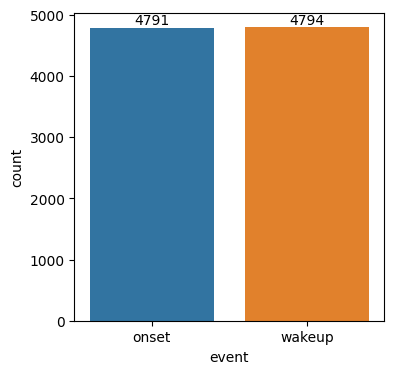

In [4]:
print('************************************************\n',train_events['event'].value_counts(), '\n************************************************')
plt.figure(figsize=(4,4))

ax = sns.countplot(data=train_events, x='event')
ax.bar_label(ax.containers[0])
plt.show()

In [5]:
train_events['night']

0         1
1         1
2         2
3         2
4         3
         ..
14501    32
14502    33
14503    33
14504    34
14505    34
Name: night, Length: 9585, dtype: int64

In [6]:
# FIRST person in dataframe
#filtered_df = train_events.loc[(train_events['series_id'] == '038441c925bb')]
filtered_df = train_events.loc[(train_events['series_id'] == train_events.loc[0]['series_id'])]
print(filtered_df)

       series_id  night   event      step                 timestamp
0   038441c925bb      1   onset    4992.0  2018-08-14T22:26:00-0400
1   038441c925bb      1  wakeup   10932.0  2018-08-15T06:41:00-0400
2   038441c925bb      2   onset   20244.0  2018-08-15T19:37:00-0400
3   038441c925bb      2  wakeup   27492.0  2018-08-16T05:41:00-0400
4   038441c925bb      3   onset   39996.0  2018-08-16T23:03:00-0400
5   038441c925bb      3  wakeup   44400.0  2018-08-17T05:10:00-0400
6   038441c925bb      4   onset   57240.0  2018-08-17T23:00:00-0400
7   038441c925bb      4  wakeup   62856.0  2018-08-18T06:48:00-0400
10  038441c925bb      6   onset   91296.0  2018-08-19T22:18:00-0400
11  038441c925bb      6  wakeup   97860.0  2018-08-20T07:25:00-0400
12  038441c925bb      7   onset  109500.0  2018-08-20T23:35:00-0400
13  038441c925bb      7  wakeup  118524.0  2018-08-21T12:07:00-0400
14  038441c925bb      8   onset  127296.0  2018-08-22T00:18:00-0400
15  038441c925bb      8  wakeup  133332.0  2018-

In [7]:
# MIDDLEish person in dataframe
#filtered_df = train_events.loc[(train_events['series_id'] == 'fe90110788d2')]
filtered_df = train_events.loc[(train_events['series_id'] == train_events.loc[7011]['series_id'])]
print(filtered_df)

with pd.option_context('display.max_rows', None,):
    print(filtered_df)

         series_id  night   event      step                 timestamp
7002  87a6cbb7c4ed      1   onset    6696.0  2017-12-18T21:33:00-0500
7003  87a6cbb7c4ed      1  wakeup   13572.0  2017-12-19T07:06:00-0500
7006  87a6cbb7c4ed      3   onset   41076.0  2017-12-20T21:18:00-0500
7007  87a6cbb7c4ed      3  wakeup   48240.0  2017-12-21T07:15:00-0500
7008  87a6cbb7c4ed      4   onset   58920.0  2017-12-21T22:05:00-0500
7009  87a6cbb7c4ed      4  wakeup   65556.0  2017-12-22T07:18:00-0500
7010  87a6cbb7c4ed      5   onset   75660.0  2017-12-22T21:20:00-0500
7011  87a6cbb7c4ed      5  wakeup   83652.0  2017-12-23T08:26:00-0500
7012  87a6cbb7c4ed      6   onset   93888.0  2017-12-23T22:39:00-0500
7013  87a6cbb7c4ed      6  wakeup  100656.0  2017-12-24T08:03:00-0500
7018  87a6cbb7c4ed      9   onset  145392.0  2017-12-26T22:11:00-0500
7019  87a6cbb7c4ed      9  wakeup  151680.0  2017-12-27T06:55:00-0500
7020  87a6cbb7c4ed     10   onset  162876.0  2017-12-27T22:28:00-0500
7021  87a6cbb7c4ed  

In [8]:
# LAST person in dataframe
#filtered_df = train_events.loc[(train_events['series_id'] == 'fe90110788d2')]
filtered_df = train_events.loc[(train_events['series_id'] == train_events.loc[14503]['series_id'])]
print(filtered_df)

with pd.option_context('display.max_rows', None,):
    print(filtered_df)

          series_id  night   event      step                 timestamp
14440  fe90110788d2      2   onset   21048.0  2017-08-05T22:44:00-0400
14441  fe90110788d2      2  wakeup   27852.0  2017-08-06T08:11:00-0400
14442  fe90110788d2      3   onset   38064.0  2017-08-06T22:22:00-0400
14443  fe90110788d2      3  wakeup   42384.0  2017-08-07T04:22:00-0400
14444  fe90110788d2      4   onset   54060.0  2017-08-07T20:35:00-0400
...             ...    ...     ...       ...                       ...
14501  fe90110788d2     32  wakeup  547152.0  2017-09-05T09:26:00-0400
14502  fe90110788d2     33   onset  556560.0  2017-09-05T22:30:00-0400
14503  fe90110788d2     33  wakeup  560604.0  2017-09-06T04:07:00-0400
14504  fe90110788d2     34   onset  574620.0  2017-09-06T23:35:00-0400
14505  fe90110788d2     34  wakeup  581604.0  2017-09-07T09:17:00-0400

[66 rows x 5 columns]
          series_id  night   event      step                 timestamp
14440  fe90110788d2      2   onset   21048.0  2017-08-

************************************************
 night
1     476
2     454
3     430
5     428
7     417
4     414
6     408
10    397
11    392
8     390
13    380
14    380
12    376
9     370
15    364
16    354
19    340
18    338
20    331
17    331
21    316
22    286
23    230
24    160
25    114
26    104
28     96
27     92
29     86
30     75
31     70
32     62
33     40
34     30
35     20
36     10
37      6
38      6
40      4
39      2
41      2
42      2
43      2
Name: count, dtype: int64 
************************************************


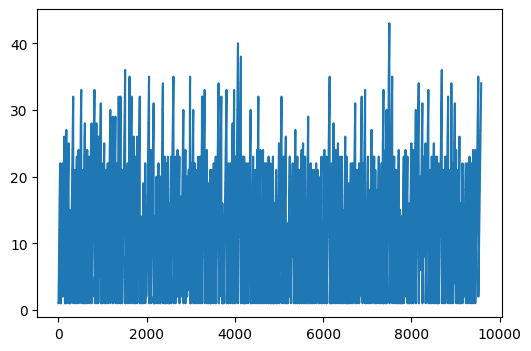

In [9]:
print('************************************************\n',train_events['night'].value_counts(), '\n************************************************')
plt.figure(figsize=(6,4))

ax = plt.plot(list(train_events['night']))
plt.show()

In [10]:
# find max night -> train_events['night']
print(train_events.loc[train_events['night'].idxmax()])

series_id                d043c0ca71cd
night                              43
event                           onset
step                         735996.0
timestamp    2019-02-07T01:28:00-0500
Name: 11248, dtype: object


In [11]:
train_events['date'] = train_events['timestamp'].str.split('T', expand=True)[0]
train_events['time'] = train_events['timestamp'].str.split('T', expand=True)[1].str.split('-', expand=True)[0]
train_events['timestamp'] = pd.to_datetime(train_events['date']+' '+train_events['time'])
train_events['hour'] = train_events['timestamp'].dt.hour
train_events

,series_id,night,event,step,timestamp,date,time,hour
0,038441c925bb,1,onset,4992.0,2018-08-14 22:26:00,2018-08-14,22:26:00,22
1,038441c925bb,1,wakeup,10932.0,2018-08-15 06:41:00,2018-08-15,06:41:00,6
2,038441c925bb,2,onset,20244.0,2018-08-15 19:37:00,2018-08-15,19:37:00,19
3,038441c925bb,2,wakeup,27492.0,2018-08-16 05:41:00,2018-08-16,05:41:00,5
4,038441c925bb,3,onset,39996.0,2018-08-16 23:03:00,2018-08-16,23:03:00,23
...,...,...,...,...,...,...,...,...
14501,fe90110788d2,32,wakeup,547152.0,2017-09-05 09:26:00,2017-09-05,09:26:00,9
14502,fe90110788d2,33,onset,556560.0,2017-09-05 22:30:00,2017-09-05,22:30:00,22
14503,fe90110788d2,33,wakeup,560604.0,2017-09-06 04:07:00,2017-09-06,04:07:00,4
14504,fe90110788d2,34,onset,574620.0,2017-09-06 23:35:00,2017-09-06,23:35:00,23


In [12]:
len(train_events.columns)

8

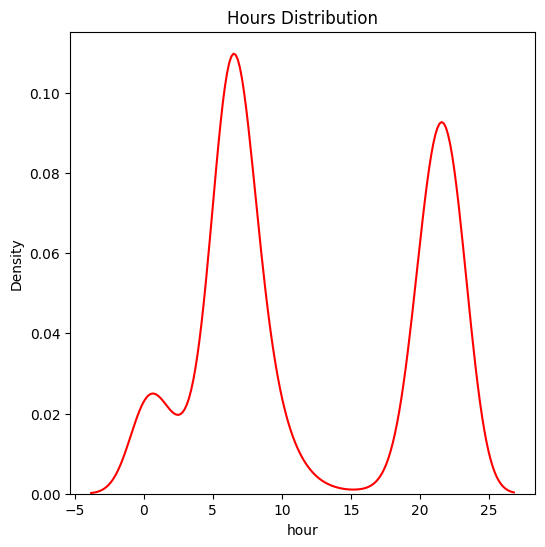

In [13]:
plt.figure(figsize=(6, 6))
plt.title('Hours Distribution')
sns.kdeplot(train_events['hour'],color='red');

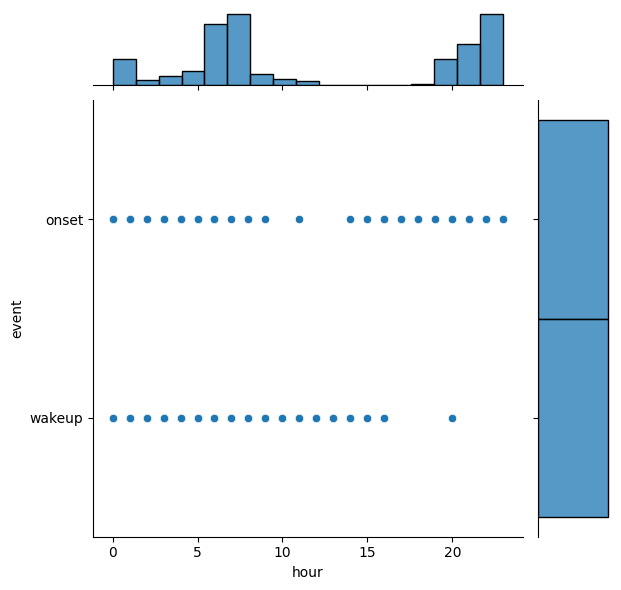

In [14]:
sns.jointplot(data=train_events, x='hour', y='event')

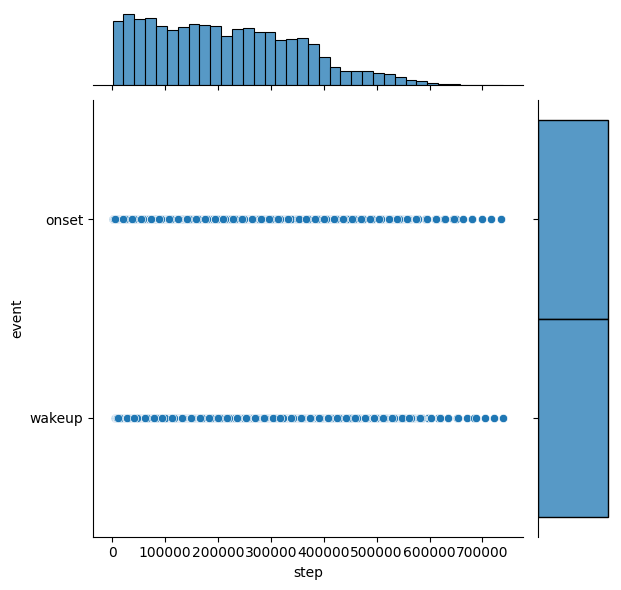

In [15]:
sns.jointplot(data=train_events, x='step', y='event')

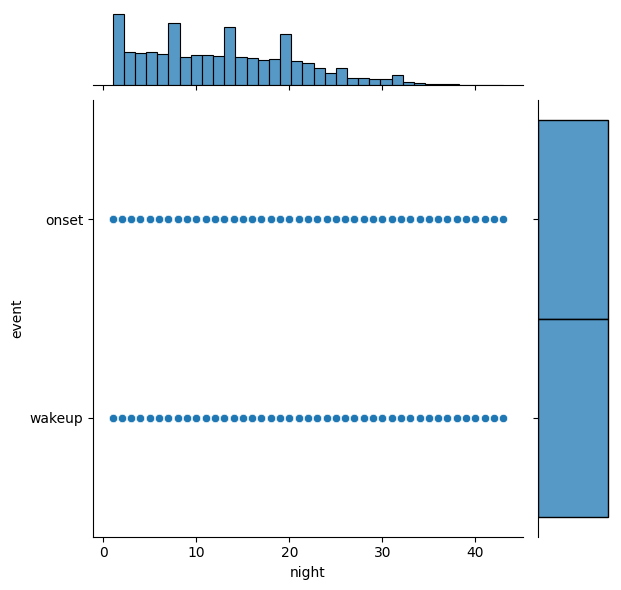

In [16]:
sns.jointplot(data=train_events, x='night', y='event')

<Axes: ylabel='count'>

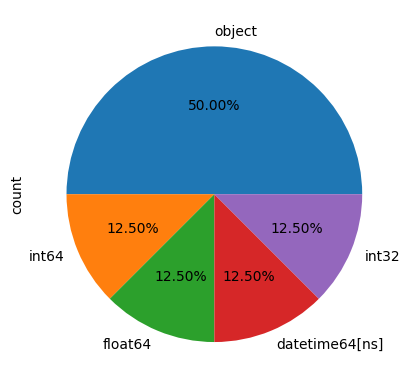

In [17]:
train_events.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

<Axes: ylabel='count'>

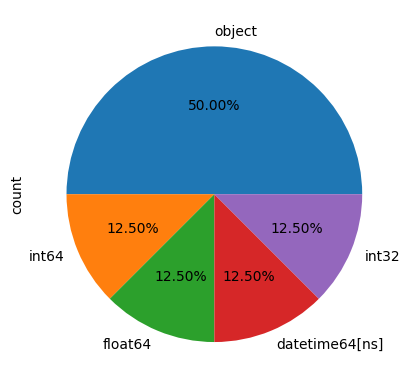

In [18]:
train_events_new = train_events.drop(['series_id', 'timestamp'], axis='columns')
train_events.dtypes.value_counts().plot.pie(autopct='%0.2f%%')

In [19]:
# parquet_train_series = '/kaggle/input/child-mind-institute-detect-sleep-states/train_series.parquet'
# train_series = pq.read_table(parquet_train_series).to_pandas()
# # print(train_file)
# parquet_test_series = '/kaggle/input/child-mind-institute-detect-sleep-states/test_series.parquet'
# test_series = pq.read_table(parquet_test_series).to_pandas()
# display(train_series)
# display(test_series)

In [20]:
# # FIRST person train metrics
# filtered_df = train_series.loc[(train_series['series_id'] == train_series.loc[0]['series_id'])]
# print(filtered_df)

train events (csv)
train series (parquet)